# Overview of the Project

In this notebook, we will predict the rate of forest cover degradation using multiple factors such as temperature rise, urbanization, deforestation policies, industrial activity, and rainfall levels. We will use Multiple Linear Regression, a supervised learning algorithm that predicts continuous values.


**Goal:** Predict the rate of forest cover loss (sq km per year) based on environmental and economic factors.

**Features (Independent Variables):**

1. Annual Temperature Rise (°C)

2. Urbanization Rate (%)

3. Deforestation Policies Index (scale 0-10)

4. Industrial Activity (CO₂ emissions in metric tons)

5. Rainfall Levels (mm)

*Target Variable:* Forest Cover Loss (sq km per year)

# Step 1: Setting Up the Environment


In [1]:
# Import essential libraries
import pandas as pd  # For handling datasets
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For plotting
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.linear_model import LinearRegression  # Multiple Linear Regression Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Model evaluation

# Ignore warnings to keep output clean
import warnings
warnings.filterwarnings("ignore")

print("Libraries loaded successfully!")


Libraries loaded successfully!


# Step 2: Load and Explore the Data


In [2]:
# Load the dataset
url = "forest_data.csv"  # Ensure the dataset is in the same directory or provide the correct path
df = pd.read_csv(url)

# Display first five rows
df.head()


,Annual Temperature Rise (°C),Urbanization Rate (%),Deforestation Policies Index (0-10),"Industrial Activity (CO₂ Emissions, metric tons)",Rainfall Levels (mm),Forest Cover Loss (sq km per year)
0,0.858299,40.739146,3.565589,2887.714889,2345.738776,14.930059
1,0.149792,12.796358,4.473028,4420.373951,1339.023111,-3.583523
2,0.212321,35.360544,9.655179,4715.337378,2412.766479,-25.808645
3,1.674945,67.847322,3.773485,3723.859916,1581.917704,29.325830
4,0.479640,59.104937,2.582268,524.436828,1710.461246,13.201909


# Step 3: Understanding the Dataset


In [3]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Display dataset information
print("\nDataset Info:")
df.info()


Missing Values:
 Annual Temperature Rise (°C)                        0
Urbanization Rate (%)                               0
Deforestation Policies Index (0-10)                 0
Industrial Activity (CO₂ Emissions, metric tons)    0
Rainfall Levels (mm)                                0
Forest Cover Loss (sq km per year)                  0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Annual Temperature Rise (°C)                      500 non-null    float64
 1   Urbanization Rate (%)                             500 non-null    float64
 2   Deforestation Policies Index (0-10)               500 non-null    float64
 3   Industrial Activity (CO₂ Emissions, metric tons)  500 non-null    float64
 4   Rainfall Levels (mm)                            

# Step 4: Visualizing the Data


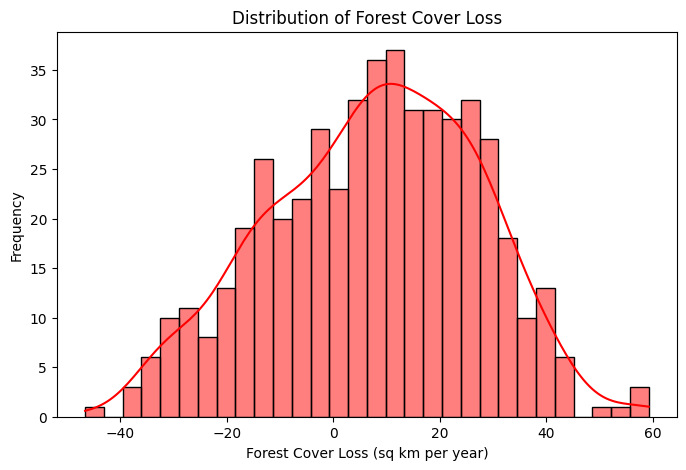

In [4]:
# Histogram of Forest Cover Loss
plt.figure(figsize=(8,5))
sns.histplot(df["Forest Cover Loss (sq km per year)"], bins=30, kde=True, color='red')
plt.title("Distribution of Forest Cover Loss")
plt.xlabel("Forest Cover Loss (sq km per year)")
plt.ylabel("Frequency")
plt.show()


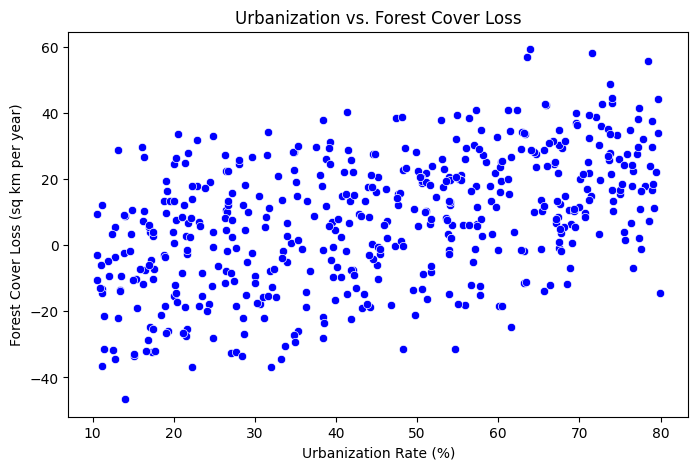

In [5]:
# Scatter plot for Urbanization vs. Forest Cover Loss
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Urbanization Rate (%)"], y=df["Forest Cover Loss (sq km per year)"], color='blue')
plt.title("Urbanization vs. Forest Cover Loss")
plt.xlabel("Urbanization Rate (%)")
plt.ylabel("Forest Cover Loss (sq km per year)")
plt.show()


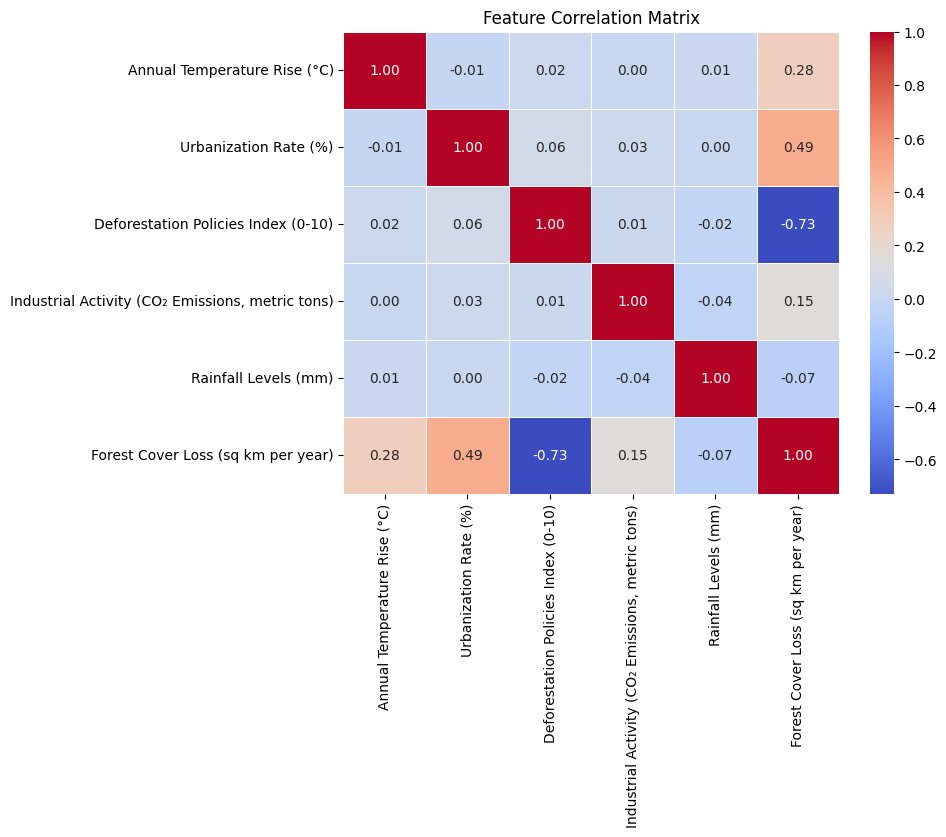

In [6]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


# Step 5: Preparing the Data
*(We will now separate our dataset into features (X) and target variable (y). The target variable is 'Forest Cover Loss (sq km per year)' which we are trying to predict.)*

**Code: Define Features and Target**

In [7]:
# Define features (independent variables) and target variable
X = df.drop(columns=["Forest Cover Loss (sq km per year)"])  # Features
y = df["Forest Cover Loss (sq km per year)"]  # Target variable

print("Features and target variable defined!")


Features and target variable defined!


**Code: Splitting the Data into Training and Testing Sets**

In [8]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (400, 5)
Testing Set Size: (100, 5)


**Code: Feature Scaling**
*(We need to scale our features to ensure a balanced model performance.)*

In [9]:
# Standardizing the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling complete!")


Feature scaling complete!


# Step 6: Training the Multiple Linear Regression Model


In [10]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Model training complete!")


Model training complete!


# Step 7: Making Predictions


In [11]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Display first few predictions
print("Predicted Forest Cover Loss:", y_pred[:10])
print("Actual Forest Cover Loss:", y_test.values[:10])


Predicted Forest Cover Loss: [ 17.37681734  23.14227295  12.85069501  17.25756798 -22.25583025
  -1.50117245  -8.57614427  -4.47583594  30.16473564 -30.80656426]
Actual Forest Cover Loss: [ 11.84341397  19.03093149  17.55763011  11.3924515  -27.92449494
   5.52937693 -15.31035426  -0.95549643  34.49943191 -24.65779258]


# Step 8: Model Evaluation


In [12]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# R-Squared Score (R²)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 4.41
Mean Squared Error (MSE): 28.64
R² Score: 0.91


#  Understanding the Metrics
Mean Absolute Error (MAE): 4.41

On average, the model’s predictions are off by 4.41 sq km from the actual forest cover loss.
A lower MAE means more precise predictions.

Mean Squared Error (MSE): 28.64

MSE penalizes larger errors more heavily than MAE.
A lower MSE is good, but it’s harder to interpret directly since it’s in squared units.

R² Score: 0.91

This means that 91% of the variability in forest cover loss can be explained by the model's features (urbanization, industrial activity, climate change, etc.).
A value close to 1 indicates a strong predictive model.

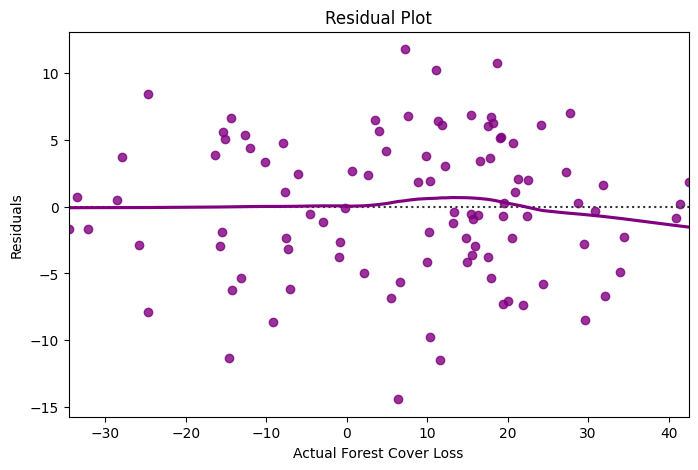

In [13]:
# Residual plot to check model accuracy
plt.figure(figsize=(8,5))
sns.residplot(x=y_test, y=y_pred, color="purple", lowess=True)
plt.title("Residual Plot")
plt.xlabel("Actual Forest Cover Loss")
plt.ylabel("Residuals")
plt.show()


I successfully built a Multiple Linear Regression model to predict forest cover loss based on environmental and economic factors. I explored the dataset, preprocessed the features, trained our model, and evaluated its performance. To improve accuracy, we can experiment with Polynomial Regression, Decision Trees, or Random Forest models for better predictions!